In [26]:
import pygor3 as p3

task0 = p3.IgorTask()
weirdos_path = "/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos/"
path=weirdos_path+"/"+"MouseTRB"
task0.update_model_filenames(model_path=path)

## Load model and genome references

In [41]:
task0.load_IgorModel()
task0.load_IgorRefGenome()
# mdl = p3.IgorModel(model_parms_file=task0.igor_model_parms_file, model_marginals_file=task0.igor_model_marginals_file)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

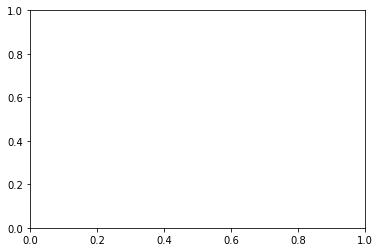

In [1]:
import matplotlib.pyplot as plt
import numpy as np
bins=range(10)

freq = np.random.random(10)
fig, ax = plt.subplots()

ax.bar(bins[:-1], freq, width=np.diff(bins), edgecolor="black", align="edge")

## Check the structure of the model

In [15]:
import pygor3 as p3
mdl = p3.IgorModel.load_default("human", "tcr_beta")
mdl['v_choice'], mdl.V_anchors

Parms filename:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Marginals filename:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt


(<xarray.DataArray (v_choice: 89)>
 array([4.88741e-03, 9.32369e-03, 9.32259e-03, 1.30320e-02, 3.43430e-04,
        8.50694e-03, 7.71250e-03, 6.12276e-04, 5.06104e-03, 4.59289e-05,
        4.48245e-03, 8.16181e-03, 7.00053e-04, 7.77164e-03, 1.16174e-02,
        1.16158e-02, 1.13872e-02, 1.06555e-02, 2.36870e-03, 2.28368e-02,
        1.56715e-04, 4.58447e-03, 0.00000e+00, 4.88782e-05, 0.00000e+00,
        1.54500e-02, 2.74050e-02, 5.18979e-03, 4.80289e-03, 1.62765e-01,
        6.61229e-02, 2.07174e-02, 7.36226e-04, 2.47846e-37, 1.07472e-02,
        2.03820e-02, 9.53245e-03, 9.53006e-03, 2.35607e-03, 2.39208e-03,
        2.39208e-03, 2.45219e-03, 1.66904e-02, 2.98807e-03, 2.98804e-03,
        1.59156e-02, 1.25468e-02, 9.06711e-03, 9.06936e-03, 9.76534e-02,
        9.57746e-03, 9.17011e-03, 1.14472e-02, 1.14458e-02, 9.77554e-03,
        1.89924e-02, 3.97949e-04, 1.70242e-03, 8.91336e-03, 6.73926e-03,
        6.69167e-03, 2.94257e-02, 1.38534e-02, 4.19227e-03, 4.19275e-03,
        2.48630e

<AxesSubplot:xlabel='v_choice'>

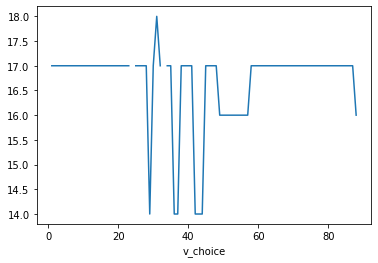

In [22]:
da_n_V = mdl['v_choice'].to_dataframe('P')
da_n_V['anchors'] = mdl.V_anchors
da_n_V
da_n_V["n_V"] = da_n_V.apply(lambda x: len(x['seq__v_choice']) - x['anchors'], axis=1 )
da_n_V['n_V'].plot()

In [8]:
da_n_V.to_dataframe('P')['anchors'] = mdl.V_anchors

id
1     270
2     270
3     270
4     270
5     270
     ... 
84    273
85    273
86    273
87    189
88    270
Name: anchor_index, Length: 86, dtype: int64

## Check genomic information dataframe

In [29]:
task0.genomes.df_genomicDs

,name,value
0,TRBD1*01,GGGACAGGGGGC
1,TRBD2*01,GGGACTGGGGGGGC


In [30]:
task0.genomes.df_J_ref_genome.head()

,name,value,anchor_index,function
0,TRBJ1-1*01,CAAACACAGAAGTCTTCTTTGGTAAAGGAACCAGACTCACAGTTGTAG,17,F
1,TRBJ1-2*01,CAAACTCCGACTACACCTTCGGCTCAGGGACCAGGCTTTTGGTAATAG,17,F
2,TRBJ1-3*01,TTCTGGAAATACGCTCTATTTTGGAGAAGGAAGCCGGCTCATTGTT...,19,F
3,TRBJ1-4*01,TTTCCAACGAAAGATTATTTTTCGGTCATGGAACCAAGCTGTCTGT...,20,F
4,TRBJ1-5*01,TAACAACCAGGCTCCGCTTTTTGGAGAGGGGACTCGACTCTCTGTT...,19,F


## Check the model

<AxesSubplot:xlabel='d gene', ylabel='P'>

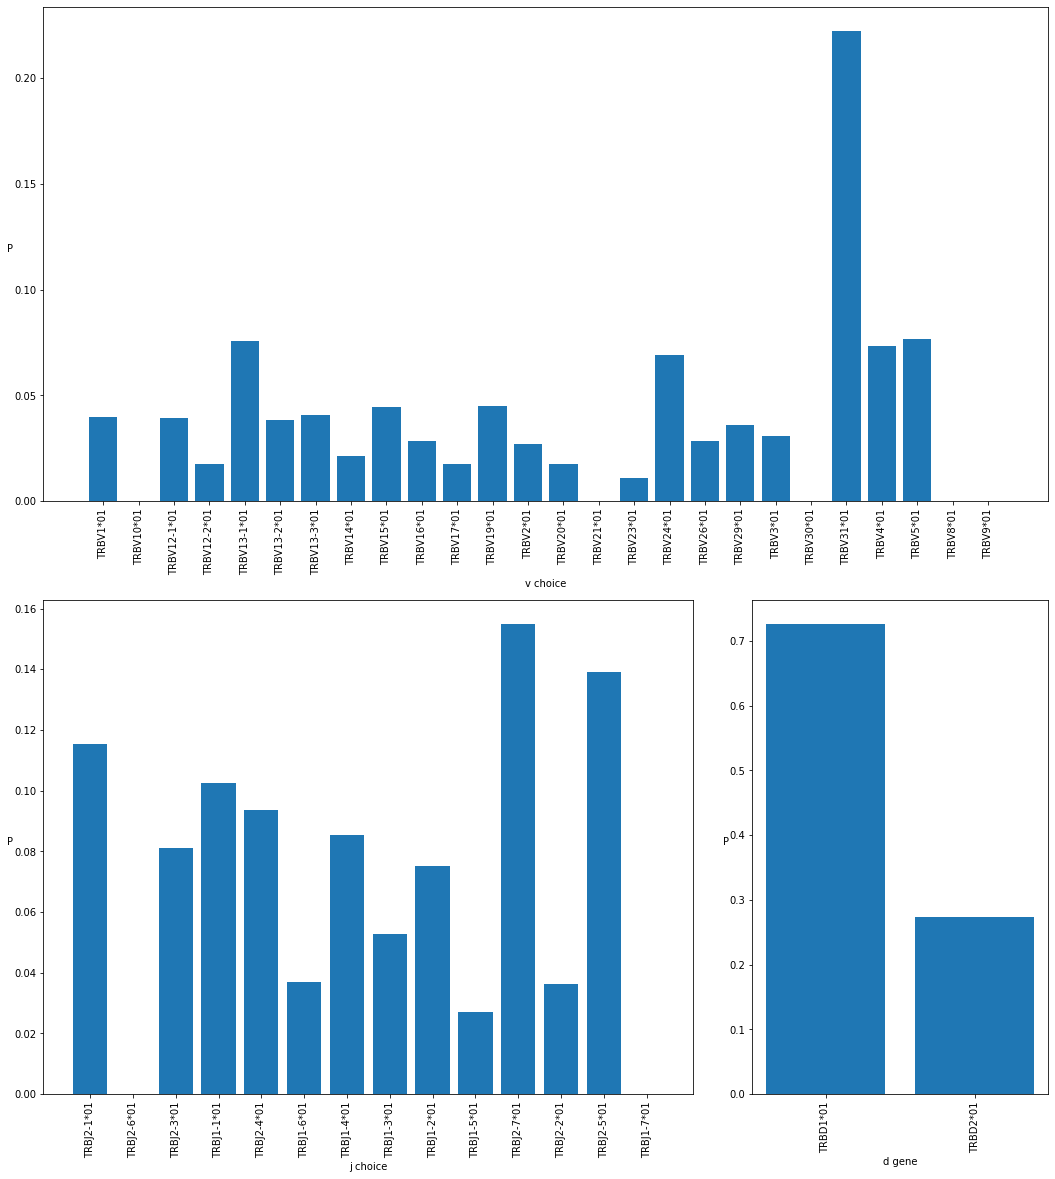

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18, 20))
grid = plt.GridSpec(2, 3, hspace=0.2, wspace=0.2)
grid
ax_v = fig.add_subplot(grid[0, :])
ax_j = fig.add_subplot(grid[1, 0:2])
ax_d = fig.add_subplot(grid[1, 2])

task0.mdl.plot_Event_Marginal('v_choice', ax=ax_v)
task0.mdl.plot_Event_Marginal('j_choice', ax=ax_j)
task0.mdl.plot_Event_Marginal('d_gene', ax=ax_d)

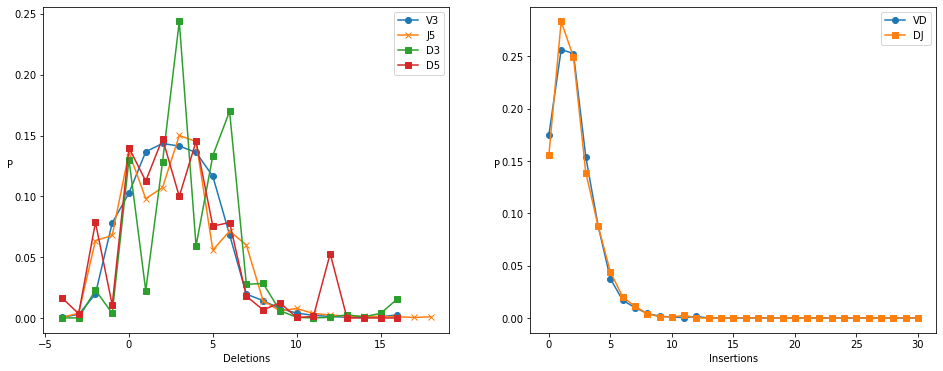

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
task0.mdl.plot_Event_Marginal('v_3_del', ax=ax[0], marker='o', label='V3')
task0.mdl.plot_Event_Marginal('j_5_del', ax=ax[0], marker='x', label='J5')
task0.mdl.plot_Event_Marginal('d_3_del', ax=ax[0], marker='s', label='D3')
task0.mdl.plot_Event_Marginal('d_5_del', ax=ax[0], marker='s', label='D5')
ax[0].set_xlabel("Deletions")
ax[0].legend()

task0.mdl.plot_Event_Marginal('vd_ins', ax=ax[1], marker='o', label='VD')
task0.mdl.plot_Event_Marginal('dj_ins', ax=ax[1], marker='s', label='DJ')
ax[1].set_xlabel("Insertions")
ax[1].legend()

<AxesSubplot:title={'center':'dj dinucl'}, xlabel='From', ylabel='To'>

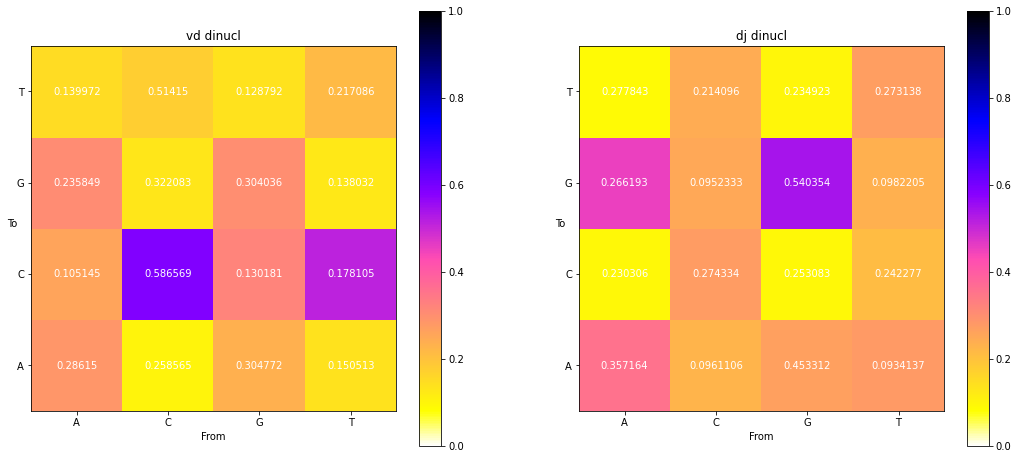

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
task0.mdl.plot_Event_Marginal('vd_dinucl', ax=ax[0])
task0.mdl.plot_Event_Marginal('dj_dinucl', ax=ax[1])

## Run evaluation of selected sequences

In [34]:
task0.to_dict()

{'igor_species': None,
 'igor_chain': None,
 'igor_model_dir_path': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB',
 'igor_path_ref_genome': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome/',
 'fln_genomicVs': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//genomicVs.fasta',
 'fln_genomicDs': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//genomicDs.fasta',
 'fln_genomicJs': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//genomicJs.fasta',
 'fln_V_gene_CDR3_anchors': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//V_gene_CDR3_anchors.csv',
 'igor_wd': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/notebooks',
 'igor_batchname': 'dataIGoR3BO1b9vFBh',
 'igor_model_parms_file': 

In [35]:
task0.run_evaluate(igor_read_seqs=weirdos_path+"align_but_no_bs.csv")

/home/alfaceor/.local/bin/igor -set_wd /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/notebooks -batch dataIGoR3BO1b9vFBh -read_seqs /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos/align_but_no_bs.csv


/home/alfaceor/.local/bin/igor -set_wd /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/notebooks -batch dataIGoR3BO1b9vFBh -set_genomic  --V /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//genomicVs.fasta --D /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//genomicDs.fasta --J /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//genomicJs.fasta -align  --all  




/home/alfaceor/.local/bin/igor -set_wd /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/notebooks -batch dataIGoR3BO1b9vFBh -set_custom_model /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB

In [37]:
task0.to_dict()

{'igor_species': None,
 'igor_chain': None,
 'igor_model_dir_path': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB',
 'igor_path_ref_genome': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome/',
 'fln_genomicVs': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//genomicVs.fasta',
 'fln_genomicDs': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//genomicDs.fasta',
 'fln_genomicJs': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//genomicJs.fasta',
 'fln_V_gene_CDR3_anchors': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//V_gene_CDR3_anchors.csv',
 'igor_wd': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/notebooks',
 'igor_batchname': 'dataIGoR3BO1b9vFBh',
 'igor_model_parms_file': 

In [38]:
task0.update_batch_filenames()

In [46]:
task0.to_dict()

{'igor_species': None,
 'igor_chain': None,
 'igor_model_dir_path': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB',
 'igor_path_ref_genome': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome/',
 'fln_genomicVs': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//genomicVs.fasta',
 'fln_genomicDs': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//genomicDs.fasta',
 'fln_genomicJs': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//genomicJs.fasta',
 'fln_V_gene_CDR3_anchors': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//V_gene_CDR3_anchors.csv',
 'igor_wd': '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/notebooks',
 'igor_batchname': 'dataIGoR3BO1b9vFBh',
 'igor_model_parms_file': 

In [48]:
!ls {task0.igor_fln_indexed_sequences}

/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/notebooks/aligns/dataIGoR3BO1b9vFBh_indexed_sequences.csv


In [50]:
task0.create_db()
!ls {task0.igor_fln_db}

/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/notebooks/dataIGoR3BO1b9vFBh.db


In [51]:
task0.load_db_from_indexed_sequences()
task0.load_db_from_indexed_cdr3()
task0.load_db_from_models()
task0.load_db_from_genomes()
task0.load_db_from_alignments()
task0.load_db_from_bestscenarios()
task0.load_db_from_pgen()

/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/notebooks/aligns/dataIGoR3BO1b9vFBh_indexed_CDR3s.csv
('',)
Incorrect number of bindings supplied. The current statement uses 5, and there are 1 supplied.
Loading parms to database
('v_choice', 'v_3_del')
('d_gene', 'd_3_del')
('d_gene', 'd_5_del')
('j_choice', 'j_5_del')
('j_choice', 'd_gene')
('d_5_del', 'd_3_del')
{'error_type': 'SingleErrorRate', 'error_values': '0.0230988'}
Loading marginals to database
Loading Gene templates ...
V /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//genomicVs.fasta
J /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//genomicJs.fasta
D /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//genomicDs.fasta
loading Anchors data ...
Loading Gene Anchors from  /home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/demo/Francesco/weirdos//MouseTRB/ref_genome//

In [58]:
aln = task0.igor_db.get_best_IgorAlignment_data_By_seq_index("V", 0)
task0.igor_fln_db

'/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/notebooks/dataIGoR3BO1b9vFBh.db'

In [26]:
mdl.write_mdldata_dir("aqui")

Writing model parms in file  aqui/models/model_parms.txt
Writing model marginals in file  aqui/models/model_marginals.txt


In [ ]:
{'igor_exec_path': '/home/olivares/.local/bin/igor', 
 'igor_datadir': '/home/olivares/.local/share/igor', 
 'igor_species': 'human', 'igor_chain': 'beta', 
 'igor_model_dir_path': '/home/olivares/.local/share/igor/models//human/tcr_beta', 
 'igor_path_ref_genome': '/home/olivares/.local/share/igor/models//human/tcr_beta/ref_genome/', 
 'fln_genomicVs': None, 'fln_genomicDs': None, 'fln_genomicJs': None, 'fln_V_gene_CDR3_anchors': None, 'fln_J_gene_CDR3_anchors': None, 
 'igor_wd': './', 'igor_batchname': 'dataIGoRYDBsA3xE3y', 
 'igor_model_parms_file': '/home/olivares/.local/share/igor/models//human/tcr_beta/models/model_parms.txt', 
 'igor_model_marginals_file': '/home/olivares/.local/share/igor/models//human/tcr_beta/models/model_marginals.txt', 
 'igor_read_seqs': None, 'igor_threads': None, 
 'igor_fln_indexed_sequences': './/aligns/dataIGoRYDBsA3xE3y_indexed_sequences.csv', 
 'igor_fln_indexed_CDR3': './/aligns/dataIGoRYDBsA3xE3y_indexed_CDR3s.csv', 
 'igor_fln_align_V_alignments': './/aligns/dataIGoRYDBsA3xE3y_V_alignments.csv', 
 'igor_fln_align_J_alignments': './/aligns/dataIGoRYDBsA3xE3y_J_alignments.csv', 
 'igor_fln_align_D_alignments': './/aligns/dataIGoRYDBsA3xE3y_D_alignments.csv', 
 'igor_fln_infer_final_marginals': './/dataIGoRYDBsA3xE3y_inference/final_marginals.txt', 
 'igor_fln_infer_final_parms': './/dataIGoRYDBsA3xE3y_inference/final_parms.txt', 
 'igor_fln_evaluate_final_marginals': './/dataIGoRYDBsA3xE3y_evaluate/final_marginals.txt', 
 'igor_fln_evaluate_final_parms': './/dataIGoRYDBsA3xE3y_evaluate/final_parms.txt', 
 'igor_fln_output_pgen': './/dataIGoRYDBsA3xE3y_output/Pgen_counts.csv', 
 'igor_fln_output_scenarios': './/dataIGoRYDBsA3xE3y_output/best_scenarios_counts.csv', 
 'igor_fln_output_coverage': './/dataIGoRYDBsA3xE3y_output/coverage.csv', 'igor_fln_generated_realizations_werr': None, 'igor_fln_generated_seqs_werr': None, 'igor_fln_generation_info': None, 'igor_fln_db': './/dataIGoRYDBsA3xE3y.db', 'b_read_seqs': False, 'b_align': False, 'b_infer': False, 'b_evaluate': False, 'b_generate': False}


## Using db file

In [1]:
import pygor3 as p3
task = p3.IgorTask()
task.igor_fln_db = '/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/pygor3/notebooks/dataIGoR3BO1b9vFBh.db'
task.create_db()
task.from_db_plot_naive_align_by_seq_index(0)

In [5]:
seq_index_list = task.igor_db.fetch_IgorIndexedSeq_indexes()
print(seq_index_list)

[0, 4, 115, 183, 294, 296, 374, 395, 401, 425, 465, 607, 644, 665, 719, 809, 840, 1082, 1202, 1525, 1568, 1612, 1769, 1782, 2375, 2426, 2431, 2450, 2478, 2625, 2709, 2737, 2749, 2775, 2825, 2886, 2959, 3152, 3326, 3613, 3620, 3654, 3692, 3718, 3773, 3774, 3891, 3960, 4026, 4036, 4044, 4081, 4113, 4258, 4261, 4311, 4314, 4405, 4466, 4474, 4503, 4529, 4599, 4608, 4655, 4659, 4671, 4673, 4681, 4691, 4698, 4854, 5076, 5132, 5161, 5237, 5350, 5434, 5440, 5530, 5556, 5853, 5857, 5925, 5934, 5948, 5955, 5973, 6237, 6330, 6466, 6560, 6566, 6639, 6675, 6977, 7034, 7172, 7240, 7264, 7403, 7427, 7431, 7446, 7506, 7598, 7608, 7610, 7637, 7688, 7704, 7716, 7746, 7818, 7877, 7894, 7895, 7930, 7938, 8015, 8031, 8078, 8086, 8091, 8103, 8254, 8268, 8366, 8599, 8628, 8921, 8933, 9103, 9182, 9221, 9260, 9275, 9427, 9452, 9497, 9506, 9564, 9763, 9783, 9927, 9952, 10123, 10305, 10316, 10386, 10395, 10407, 10429, 10479, 10494, 10511, 10568, 10580, 10667, 10669, 10758, 11164, 11175, 11176, 11203, 11398, 1146

In [ ]:
import pygor3 as p3
task = p3.IgorTask.load_from_batchname("CCC")
task.igor_specie = "human"
task.igor_chain = "beta"
task.update_batch_filenames()
task.load_IgorModel()

In [5]:
# Now create a database for Indexed Sequences
!head {task.igor_fln_indexed_sequences}

seq_index;sequence
0;AGCAACATGAGCCCTGAAGACAGCAGCATATATCTCTGCAGCGTTGTAGTGTTGAGGGGACGGACCGGGGAGCTGTTTTTTGGAGAA
1;CTCAGGCTGGAGTTGGCTGCTCCCTCCCAGACATCTGTGTACTTCTGTGCCAGCAGTTACGGGGGAGCCGGCTACACCTTCGGTTCG
2;AGTTCTAAGAAGCTCCTTCTCAGTGACTCTGGCTTCTATCTCTGTGCCTGGAGCGCCGGACAGAACTATGGCTACACCTTCGGTTCG
3;ACAGAGCGGGGGGACTCAGCCGTGTATCTCTGTGCCAGCAGCTCTGGGGCTAGCGGGGCCGCGAGAGAGACCCAGTACTTCGGGCCA
4;ACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCTAGAGGCGGCAGGGCAAACACCGGGGAGCTGTTTTTTGGAGAA
5;ACGATCCAGCGCACACAGCAGGAGGACTCGGCCGTGTATCTCTGTGCCAGCAGCTTCACAAACCAAGAGACCCAGTACTTCGGGCCA
6;GTGAACGCCTTGTTGCTAGGGGACTCGGCCCTCTATCTCTGTGCCAGCAGCCCGGGGATCTATAATTCACCCCTCCACTTTGGGAAC
7;CGCACACAGCAGGAGGACTCCGCCGTGTATCTCTGTGCCAGCAGCTTACGAGGGGGAGGCAGCAATCAGCCCCAGCATTTTGGTGAT
8;ACGATTCAGCGCACAGAGCAGCGGGACTCAGCCATGTATCGCTGTGCTAGCAGCGTGACGAACACCGGGGAGCTGTTTTTTGGAGAA


In [4]:
task.igor_db.

'./CCC.db'

In [5]:
!file {task.igor_db}

./CCC.db: cannot open `./CCC.db' (No such file or directory)


In [39]:
import pygor3 as p3
bs0 = p3.IgorBestScenariosVDJ()
aaa=str(bs0)
aaa=eval(aaa)
list(aaa.keys())

['seq_index',
 'scenario_rank',
 'scenario_proba_cond_seq',
 'v_choice',
 'j_choice',
 'd_gene',
 'v_3_del',
 'd_5_del',
 'd_3_del',
 'j_5_del',
 'vd_ins',
 'vd_dinucl',
 'dj_ins',
 'dj_dinucl',
 'mismatches',
 'mismatcheslen']

In [2]:
print(bs)

<class 'pygor3.IgorBestScenarios.IgorBestScenariosVDJ'>


In [63]:
!cat -n {task.igor_fln_output_scenarios}
task.mdl

     1	seq_index;scenario_rank;scenario_proba_cond_seq;GeneChoice_V_gene_Undefined_side_prio7_size89;GeneChoice_J_gene_Undefined_side_prio7_size15;GeneChoice_D_gene_Undefined_side_prio6_size3;Deletion_V_gene_Three_prime_prio5_size21;Deletion_D_gene_Five_prime_prio5_size21;Deletion_D_gene_Three_prime_prio5_size21;Deletion_J_gene_Five_prime_prio5_size23;Insertion_VD_genes_Undefined_side_prio4_size31;DinucMarkov_VD_genes_Undefined_side_prio3_size16;Insertion_DJ_gene_Undefined_side_prio2_size31;DinucMarkov_DJ_gene_Undefined_side_prio1_size16;Mismatches
     2	17;1;0.0440476;(31);(8);(2);(8);(7);(15);(4);(0);();(0);();()
     3	17;2;0.0332147;(31);(8);(2);(8);(7);(16);(4);(0);();(1);(1);()
     4	17;3;0.0226536;(31);(8);(1);(8);(7);(15);(4);(0);();(0);();()
     5	17;4;0.0180412;(31);(8);(2);(8);(5);(19);(4);(2);(0,1);(0);();()
     6	17;5;0.0178797;(31);(8);(2);(8);(6);(18);(4);(0);();(2);(1,0);()
     7	19;1;0.260819;(26);(4);(0);(7);(7);(6);(3);(5);(0,1,2,2,1);(2);(2,3);()
     8	19;2;0.

In [24]:
# open file
strSepChar=";"
# Open file to write events
with open(task.igor_fln_output_scenarios, "r") as ofile:
    aaa = ofile.readline()
    print(aaa.split(strSepChar), len(aaa.split(strSepChar)) )
    line = ofile.readline()
    print(line.split(strSepChar), len(line.split(strSepChar)) )
    bs = p3.IgorBestScenariosVDJ.load_FromLineBestScenario(line)
    bs.mdlParms = task.mdl.parms
    print(bs)    
    

['seq_index', 'scenario_rank', 'scenario_proba_cond_seq', 'GeneChoice_V_gene_Undefined_side_prio7_size89', 'GeneChoice_J_gene_Undefined_side_prio7_size15', 'GeneChoice_D_gene_Undefined_side_prio6_size3', 'Deletion_V_gene_Three_prime_prio5_size21', 'Deletion_D_gene_Five_prime_prio5_size21', 'Deletion_D_gene_Three_prime_prio5_size21', 'Deletion_J_gene_Five_prime_prio5_size23', 'Insertion_VD_genes_Undefined_side_prio4_size31', 'DinucMarkov_VD_genes_Undefined_side_prio3_size16', 'Insertion_DJ_gene_Undefined_side_prio2_size31', 'DinucMarkov_DJ_gene_Undefined_side_prio1_size16', 'Mismatches\n'] 15
['17', '1', '0.0440476', '(31)', '(8)', '(2)', '(8)', '(7)', '(15)', '(4)', '(0)', '()', '(0)', '()', '()\n'] 15
31 <class 'str'> 2
{'seq_index': 17, 'scenario_rank': 1, 'scenario_proba_cond_seq': 0.0440476, 'v_choice': 31, 'j_choice': 8, 'd_gene': 2, 'v_3_del': 8, 'd_5_del': 7, 'd_3_del': 15, 'j_5_del': 4, 'vd_ins': 0, 'vd_dinucl': (), 'dj_ins': 0, 'dj_dinucl': (), 'mismatches': (), 'mismatcheslen

In [40]:
len( list( bs.to_dict_names().keys() ) )


16

In [53]:
bs0 = p3.IgorBestScenariosVDJ()
bsHeaderList=list( eval(str(bs0)).keys() )
strHeader = ";".join(bsHeaderList)
strHeader

'seq_index;scenario_rank;scenario_proba_cond_seq;v_choice;j_choice;d_gene;v_3_del;d_5_del;d_3_del;j_5_del;vd_ins;vd_dinucl;dj_ins;dj_dinucl;mismatches;mismatcheslen'

In [5]:
import pygor3 as p3
task = p3.IgorTask.load_from_batchname("CCC")
task.igor_specie = "human"
task.igor_chain = "beta"
task.update_batch_filenames()
task.load_IgorModel()

strSepChar=';'

bs0 = p3.IgorBestScenariosVDJ()
bsHeaderList=list( eval(str(bs0)).keys() )
strHeader = ";".join(bsHeaderList)
fln_output_scenarios_names = task.igor_batchname+"_output_scenarios_names.csv"
ofile = open(fln_output_scenarios_names, "w")
ofile.write(strHeader+'\n')

with open(task.igor_fln_output_scenarios, "r") as ifile:
    inputHeader = ifile.readline()
    
    for line in ifile.readlines():
        #print(line.split(strSepChar), len(line.split(strSepChar)) )
        line = line.replace("\n","")
        bs = p3.IgorBestScenariosVDJ.load_FromLineBestScenario(line)
        bs.mdlParms = task.mdl.parms
        #print(bs)
        aaa = strSepChar.join( list(map(str, bs.to_dict_names().values() ) ) )
        ofile.write(aaa)

ofile.close()
print("Exported scenarios in :", fln_output_scenarios_names)

/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/IGoR/share/igor
/home/alfaceor/Dropbox/PosDoc/IGoR/dev/MyGithub/IGoR/share/igor
Parms filename:  /home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Margs filename:  /home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt
--------------------------------------------------
Exported scenarios in : CCC_output_scenarios_names.csv


In [6]:
!head {fln_output_scenarios_names}

seq_index;scenario_rank;scenario_proba_cond_seq;v_choice;j_choice;d_gene;v_3_del;d_5_del;d_3_del;j_5_del;vd_ins;vd_dinucl;dj_ins;dj_dinucl;mismatches;mismatcheslen
17;1;0.0440476;M11951|TRBV24-1*01|Homo sapiens|F|V-REGION|189..476|288 nt|1| | | | |288+0=288| | |;X02987|TRBJ2-2*01|Homo sapiens|F|J-REGION|995..1045|51 nt|3| | | | |51+0=51| | |; TRBD2*02;4;3;11;0;0;[];0;[];[];017;2;0.0332147;M11951|TRBV24-1*01|Homo sapiens|F|V-REGION|189..476|288 nt|1| | | | |288+0=288| | |;X02987|TRBJ2-2*01|Homo sapiens|F|J-REGION|995..1045|51 nt|3| | | | |51+0=51| | |; TRBD2*02;4;3;12;0;0;[];1;[1];[];017;3;0.0226536;M11951|TRBV24-1*01|Homo sapiens|F|V-REGION|189..476|288 nt|1| | | | |288+0=288| | |;X02987|TRBJ2-2*01|Homo sapiens|F|J-REGION|995..1045|51 nt|3| | | | |51+0=51| | |; TRBD2*01;4;3;11;0;0;[];0;[];[];017;4;0.0180412;M11951|TRBV24-1*01|Homo sapiens|F|V-REGION|189..476|288 nt|1| | | | |288+0=288| | |;X02987|TRBJ2-2*01|Homo sapiens|F|J-REGION|995..1045|51 nt|3| | | | |51+0=51| | |; TRBD2*02;4;1;15

In [88]:
line #= "1;5;0.02142;(63);(1);(1);(9);(12);(6);(12);(2);(3,0);(4);(1,1,2,0);()"



'6;1;0.145365;(55);(6);(0);(8);(11);(5);(7);(2);(1,1);(2);(3,0);(17)'

In [84]:
(4)

4

In [89]:
bs = p3.IgorBestScenariosVDJ.load_FromLineBestScenario(line)

55 <class 'str'> 2
object of type 'int' has no len()


TypeError: object of type 'int' has no len()

In [72]:
bs = p3.IgorBestScenariosVDJ.load_FromLineBestScenario(line)
bs.mdlParms = task.mdl.parms
print(bs)
aaa = strSepChar.join( list(map(str, bs.to_dict_names().values() ) ) )

55 <class 'str'> 2
object of type 'int' has no len()


TypeError: object of type 'int' has no len()